In [30]:
import scipy.integrate as ode
import numpy as np
import matplotlib.pyplot as plt

In [3]:
s = 1
sig = 0.4
def f(t,u):
    return s*u - sig* u**3
f0 = 2
d = ode.solve_ivp(f,[0,10],[4])

We suppose the solution writes as:
$$
N(t,z) = \rho(t)\frac{\sqrt{f(t)}}{\sqrt{2\pi}} \exp{(-\frac{f(t)}{2}(z-\mu(t))^2)}
$$

We have the following system of ODEs 

$$
\begin{cases}
f'(t) = 2s(t)f(t)-2\sigma f(t)^3\\
\mu'(t) = 2 \frac{s(t)}{f(t)}(\theta(t) - \mu(t)) \\
\rho'(t) = \rho(t)\big(\sigma f(t) (f(t) -1) + s(t)\mu(t)(\theta(t) - \mu(t)) -s(t)\theta(t)^2 + r_{\max}  - \kappa \rho(t) \big)
\end{cases}
$$

In [55]:
N = 200
a, b = [0, 10]
dz = (b - a) / N
Z = np.linspace(a ,b, N)
theta = 4.5
s = 1
sigma = 0.5
kappa = 1
r_max = 1

In [49]:
def mean(Z, U):
    return np.sum(U * Z, axis=-1) / np.sum(U, axis=-1)

def var(Z, U):
    mu = mean(Z, U)
    return np.sum(U * Z**2, axis=-1) / np.sum(U, axis=-1) - mu**2 

def source_normal(Z, mu=5, sigma=0.5):    
    return (.5 / (2 * np.pi * sigma**2)**.5) * np.exp(-0.5 * ((Z - mu)**2) / sigma**2)

In [52]:
N0 = source_normal(Z,sigma = sigma)
f0 = 1/var(Z,N0)
mu0 = mean(Z,N0)
rho0 = ode.trapz(N0)
Tstart = 0
Tend = 20
dt = 0.02
NbT = int(Tend/dt)
dts = np.linspace(Tstart,Tend,NbT)

In [58]:
# U = [f,mu,rho]

def eval_fun(t,u):
    eval_f = s*u[0] - sigma * u[0]**3
    eval_mu = 2*(u[0]/2)*(theta-u[1])
    eval_rho = u[2]*(sigma*u[0] *(u[0] -1) + s*u[1]*(theta-u[1]) - s*theta**2 + r_max - kappa*u[1])
    return [eval_f, eval_mu, eval_rho]

solver  = ode.solve_ivp(eval_fun,[Tstart, Tend],[f0,mu0,rho0], t_eval = dts)

In [85]:
f = solver.y[0]
mu = solver.y[1]
rho = solver.y[2]
N = 0.5*(np.sqrt(f[-1])/(np.sqrt(2*np.pi)))*np.exp(-(f[-1]/2)*(Z-mu[-1])**2)


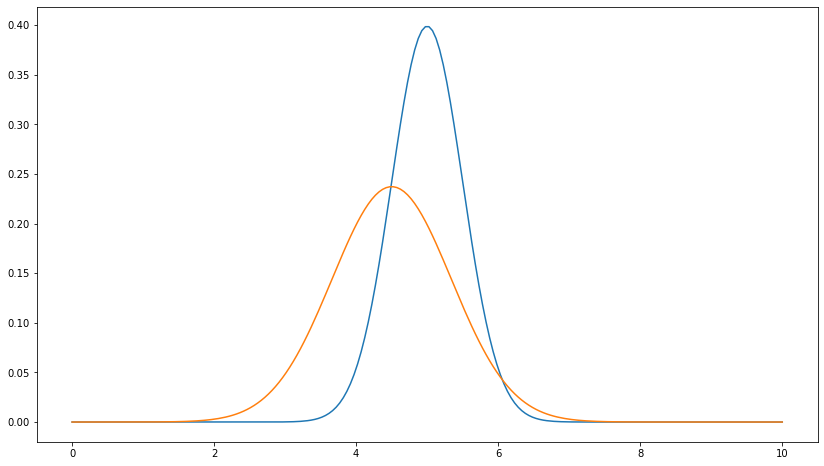

In [86]:
plt.figure(figsize = (14,8))
plt.plot(Z,N0)
plt.plot(Z,N)
plt.show()